In [1]:
from tcsim.system import*
from tcsim.visualization import*
from tcsim.gates import*

In [154]:
N = 30

chi = 0.035 * 2 * pi   # parameter in the dispersive hamiltonian


tlist = np.linspace(0, 500, 2000)

In [155]:
# cavity operators
a = tensor(destroy(N), qeye(2))
nc = a.dag() * a
xc = a + a.dag()

# atomic operators
sm = tensor(qeye(N), destroy(2))
sz = tensor(qeye(N), sigmaz())
sx = tensor(qeye(N), sigmax())
nq = sm.dag() * sm
xq = sm + sm.dag()

I = tensor(qeye(N), qeye(2))

In [156]:
# dispersive hamiltonian
H =  -chi/2 * (a.dag() * a) *sz

In [14]:
psi0 = tensor(coherent(N, 1), (basis(2,0)+(basis(2,1))))


Cavity Spectrum

In [15]:
corr_vec = correlation(H, psi0, None, tlist, [], a.dag(), a)

c:\Users\jonat\Desktop\Coding\qcrew\qcrew\lib\site-packages\qutip\correlation.py:748: FutureWarning: correlation() now legacy, please use correlation_2op_2t()
  warn("correlation() now legacy, please use correlation_2op_2t()",


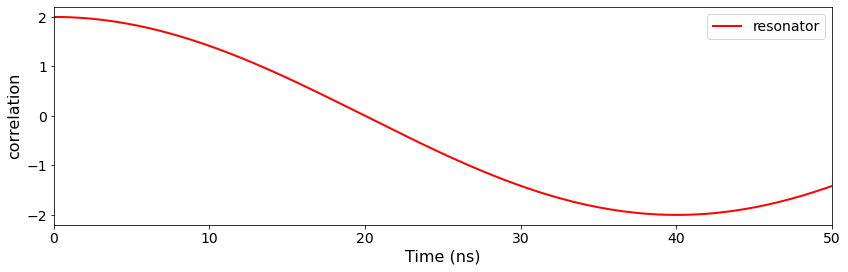

In [16]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,4))

ax.plot(tlist, real(corr_vec), 'r', linewidth=2, label="resonator")
ax.set_ylabel("correlation", fontsize=16)
ax.set_xlabel("Time (ns)", fontsize=16)
ax.legend()
ax.set_xlim(0,50)
fig.tight_layout()

In [36]:
w, S = spectrum_correlation_fft(tlist, corr_vec)

IndexError: index 5000 is out of bounds for axis 0 with size 1000

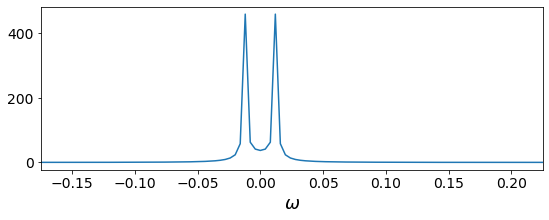

In [18]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w / (2 * pi), abs(S))
ax.set_xlabel(r'$\omega$', fontsize=18)
ax.set_xlim(chi/(2*pi)-.2, chi/(2*pi)+.2);


# qubit spectrum

In [96]:
tlist = np.linspace(0, 5000, 10000)
psi0 = tensor(coherent(N, 2), (basis(2,0)))
corr_vec = correlation(H, psi0, None, tlist, [], sx, sx)
w, S = spectrum_correlation_fft(tlist, corr_vec)

c:\Users\jonat\Desktop\Coding\qcrew\qcrew\lib\site-packages\qutip\correlation.py:748: FutureWarning: correlation() now legacy, please use correlation_2op_2t()
  warn("correlation() now legacy, please use correlation_2op_2t()",


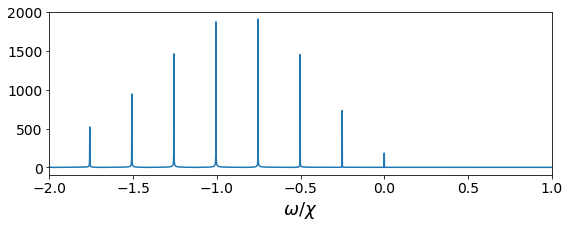

In [100]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot((w), abs(S))
ax.set_xlabel(r'$\omega/\chi$', fontsize=18)
ax.set_xlim(-2, 1);

Load experimental Data

In [132]:
# rescale data matrix to 1 to -1
def scale(col, min, max):
    range = col.max() - col.min()
    a = (col - col.min()) / range
    return a * (max - min) + min

In [164]:
# opening the file and loading the data
import h5py
filepath = (
    r"C:\Users\jonat\Desktop\Coding\qcrew\TransmonCavity\ExpData\092656_panther_number_split_spec.h5"
)
f = h5py.File(filepath, "r")

I = np.mean(np.array(f['data']['I']),0)
freqs = np.linspace(-2,1,301)

c:\Users\jonat\Desktop\Coding\qcrew\qcrew\lib\site-packages\qutip\correlation.py:748: FutureWarning: correlation() now legacy, please use correlation_2op_2t()
  warn("correlation() now legacy, please use correlation_2op_2t()",


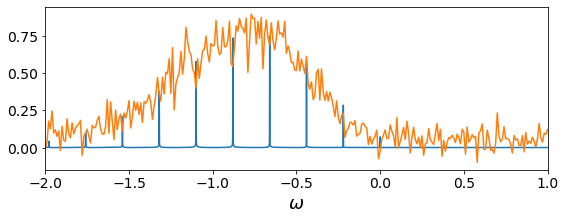

In [166]:
# cavity state
tlist = np.linspace(0, 5000, 10000)
psi0 = tensor(coherent(N, 2), (basis(2,0)))
corr_vec = correlation(H, psi0, None, tlist, [], sx, sx)
w, S = spectrum_correlation_fft(tlist, corr_vec)


Iscale =scale(I,0, 1)
Sscale = scale(abs(S),0,0.75)

fig, ax = plt.subplots(figsize=(9,3))
ax.plot((w), abs(Sscale))
ax.plot(freqs,(Iscale)*-1+0.9)
ax.set_xlabel(r'$\omega$', fontsize=18)
ax.set_xlim(-2, 1);